Winston Zhuang
wz225@cornell.edu

Dog Intelligence 

Source:
https://www.kaggle.com/datasets/thedevastator/canine-intelligence-and-size?select=dog_intelligence.csv 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Can the size of various dog breeds be used to predict their average intelligence? Additionally, can size and intelligence be used to predict continent of origin for each dog species?
I predict that dog intelligence can be predicted through size as the larger the dog the larger their brain and thus the smarter the dog breed will be on average. I think predicting a dog breed's continent of origin with size and intelligence measurements will yield poor accuracy scores as each continent has various breeds with different sizes and intelligence.

Below two csv files (dog_intelligence and breed_info) are concatenated and cleaned with the use of for loops and assignment of values. A new column which contains information on the specified dog breed's origin is added to the data frame as well. Dog breeds that don't appear in both of the csv files are removed in order to create a single consistent data frame.

Breed ~ The breed of dog

Classification ~ Size classification of the dog according to the American Kennel Club

obey% ~ Probability the breed obeys the first command

reps_lower ~ The lower limit of repetitions to understand new commands

reps_higher ~ The upper limit of reptitions to understand new commands

height_low_inches ~ The lower range of the height of the dog in inches

height_high_inches ~ The upper range of the height of the dog in inches

weight_low_lbs ~ The lower range of the weight of the dog in pounds

weight_high_lbs ~ The upper range of the weight of the dog in pounds

Origins ~ The continent the breed originates from

In [4]:
dogiq=pd.read_csv('dog_intelligence.csv')
breedinfo=pd.read_csv('breed_info.csv')
breedorigin1=['Asia', 'Asia', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Asia', 'North America', 'North America', 'Europe']
breedorigin2=['Europe', 'Europe', 'Europe', 'North America', 'Asia', 'Europe', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']
breedorigin3=['Europe', 'Europe', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'North America', 'North America', 'Oceania', 'Oceania', 'Europe', 'Europe', 'Europe']
breedorigin4=['Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']
breedorigin5=['North America', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'North America', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'North Ameria', 'Oceania']
breedorigin6=['Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe']
breederorigin7=['Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Oceania', 'Europe', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'North America', 'Africa', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'North America', 'Europe']
breedorigins=breedorigin1+breedorigin2+breedorigin3+breedorigin4+breedorigin5+breedorigin6+breederorigin7
breedinfo['Origins']=breedorigins
dogintel=pd.concat([dogiq,breedinfo])
dogintel=dogintel.sort_values('Breed',ascending=True)
dogintel=dogintel.reset_index()
dogintel=dogintel.drop(['level_0','index'],axis=1)
dup=[]
single=[]
for i in range(0,len(dogintel)):
    breed=dogintel.iloc[i]['Breed']
    temp=dogintel[dogintel['Breed']==breed].index.values
    if dogintel.iloc[i]['Classification']=='Lowest Degree of Working/Obedience Intelligence ':
        dogintel.loc[i,['obey']]='10%'
    if len(temp)==1:
        dup.append(temp[0])
    if len(temp)==2:
        dup.append(temp[1])
        if pd.isna(dogintel.iloc[temp[0]]['height_low_inches']):
            dogintel.at[temp[0],'height_low_inches']=dogintel.iloc[temp[1]]['height_low_inches']
        elif pd.isna(dogintel.iloc[temp[1]]['height_low_inches']):
            dogintel.at[temp[1],'height_low_inches']=dogintel.iloc[temp[1]]['height_low_inches']

        if pd.isna(dogintel.iloc[temp[0]]['height_high_inches']):
            dogintel.at[temp[0],'height_high_inches']=dogintel.iloc[temp[1]]['height_high_inches']
        elif pd.isna(dogintel.iloc[temp[1]]['height_high_inches']):
            dogintel.at[temp[1],'height_high_inches']=dogintel.iloc[temp[1]]['height_high_inches']

        if pd.isna(dogintel.iloc[temp[0]]['weight_low_lbs']):
            dogintel.at[temp[0],'weight_low_lbs']=dogintel.iloc[temp[1]]['weight_low_lbs']
        elif pd.isna(dogintel.iloc[temp[1]]['weight_low_lbs']):
            dogintel.at[temp[1],'weight_low_lbs']=dogintel.iloc[temp[1]]['weight_low_lbs']

        if pd.isna(dogintel.iloc[temp[0]]['weight_high_lbs']):
            dogintel.at[temp[0],'weight_high_lbs']=dogintel.iloc[temp[1]]['weight_high_lbs']
        elif pd.isna(dogintel.iloc[temp[1]]['weight_high_lbs']):
            dogintel.at[temp[1],'weight_high_lbs']=dogintel.iloc[temp[1]]['weight_high_lbs']

        if pd.isna(dogintel.iloc[temp[0]]['Classification']):
            dogintel.at[temp[0],'Classification']=dogintel.iloc[temp[1]]['Classification']
        elif pd.isna(dogintel.iloc[temp[1]]['Classification']):
            dogintel.at[temp[1],'Classification']=dogintel.iloc[temp[0]]['Classification']

        if pd.isna(dogintel.iloc[temp[0]]['obey']):
            dogintel.at[temp[0],'obey']=dogintel.iloc[temp[1]]['obey']
        elif pd.isna(dogintel.iloc[temp[1]]['obey']):
            dogintel.at[temp[1],'obey']=dogintel.iloc[temp[0]]['obey']

        if pd.isna(dogintel.iloc[temp[0]]['reps_lower']):
            dogintel.at[temp[0],'reps_lower']=dogintel.iloc[temp[1]]['reps_lower']
        elif pd.isna(dogintel.iloc[temp[1]]['reps_lower']):
            dogintel.at[temp[1],'reps_lower']=dogintel.iloc[temp[0]]['reps_lower']

        if pd.isna(dogintel.iloc[temp[0]]['reps_upper']):
            dogintel.at[temp[0],'reps_upper']=dogintel.iloc[temp[1]]['reps_upper']
        elif pd.isna(dogintel.iloc[temp[1]]['reps_upper']):
            dogintel.at[temp[1],'reps_upper']=dogintel.iloc[temp[0]]['reps_upper']

        if pd.isna(dogintel.iloc[temp[0]]['Origins']):
            dogintel.at[temp[0],'Origins']=dogintel.iloc[temp[1]]['Origins']
        elif pd.isna(dogintel.iloc[temp[1]]['Origins']):
            dogintel.at[temp[1],'Origins']=dogintel.iloc[temp[0]]['Origins']


dup=pd.unique(dup)
dogintel=dogintel.drop(dogintel.index[dup])

dogintel=dogintel.reset_index()
dogintel=dogintel.drop(['index'],axis=1)
dogintel=dogintel[dogintel.height_low_inches!='na']
dogintel['obey'] = dogintel['obey'].replace({'%':''}, regex=True)
dogintel.rename(columns={'obey':'obey %'}, inplace=True)
dogintel




,Breed,Classification,obey %,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Origins
0,Affenpinscher,Above Average Working Dogs,70,16.0,25.0,9,12,8,12,Europe
1,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,10,81.0,100.0,25,27,50,60,Asia
2,Airdale Terrier,Above Average Working Dogs,70,16.0,25.0,22,24,45,45,Europe
3,Akita,Average Working/Obedience Intelligence,50,26.0,40.0,26,28,80,120,Asia
5,American Foxhound,Average Working/Obedience Intelligence,50,26.0,40.0,22,25,65,70,North America
...,...,...,...,...,...,...,...,...,...,...
102,West Highland White Terrier,Average Working/Obedience Intelligence,50,26.0,40.0,11,11,13,15,Europe
103,Whippet,Average Working/Obedience Intelligence,50,26.0,40.0,18,22,27,30,Europe
104,Wire Fox Terrier,Average Working/Obedience Intelligence,50,26.0,40.0,13,16,15,20,Europe
105,Wirehaired Pointing Griffon,Average Working/Obedience Intelligence,50,26.0,40.0,20,24,45,60,Europe


The first model created here uses the data for the average size of various dog breeds to predict the classification of dog breeds. The classification of a dog breed categorizes the dog based on how quickly it generally learns new commands and thus how intelligent the dog breed is. By Using a K-Nearest Neighbors classifier the model will be able to predict the classification of a data point (dog breed) based on the classification of the points surrounding it/the dogs with similar sizes. 

In [5]:
X=dogintel.drop(['Breed', 'Classification', 'obey %', 'reps_lower', 'reps_upper','Origins'], axis=1)
Y=dogintel['Classification']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1998)
coder = LabelEncoder()
for i in dogintel.columns:
    dogintel[i] = coder.fit_transform(dogintel[i])

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1998)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))

Train Accuracy:  0.5222222222222223
Test Accuracy:  0.4375


Because the train accuracy and test accuracy being 0.52 and 0.44 respectively, this shows that by using the K-Nearest Neighbors model the correct classification for each dog breed was identified at around 48%. There were 6 possible intelligence categories which means the model performed much better than a random guess which would yield a 16.7% accuracy score on average. The accuracy score of 48% means that around every other prediction was correct in identifying the dog breed's classification given average size. However, being incorrect 52% of the time shows that the model was not extremely. Since the accuracy score is higher than random classification it suggests there is a potential association between size and intelligence.

Next, a decision tree model will be used to determine the origins of a dog breed based on it's average size. A decision tree was selected here as its useful to see the paths of the tree and the condition at each node/split to see if there is a general dog breed sizing trend from continent to continent. To determine the best score and depth for the decision tree model a for loop will be implemented. The best score and depth for the tree is important information to track as it can show skewness in the data in terms of breeds being concentrated in a certain continent rather than being fairly dispersed.

Best Accuracy Prediction Score: 0.75
Best Depth Value: 2


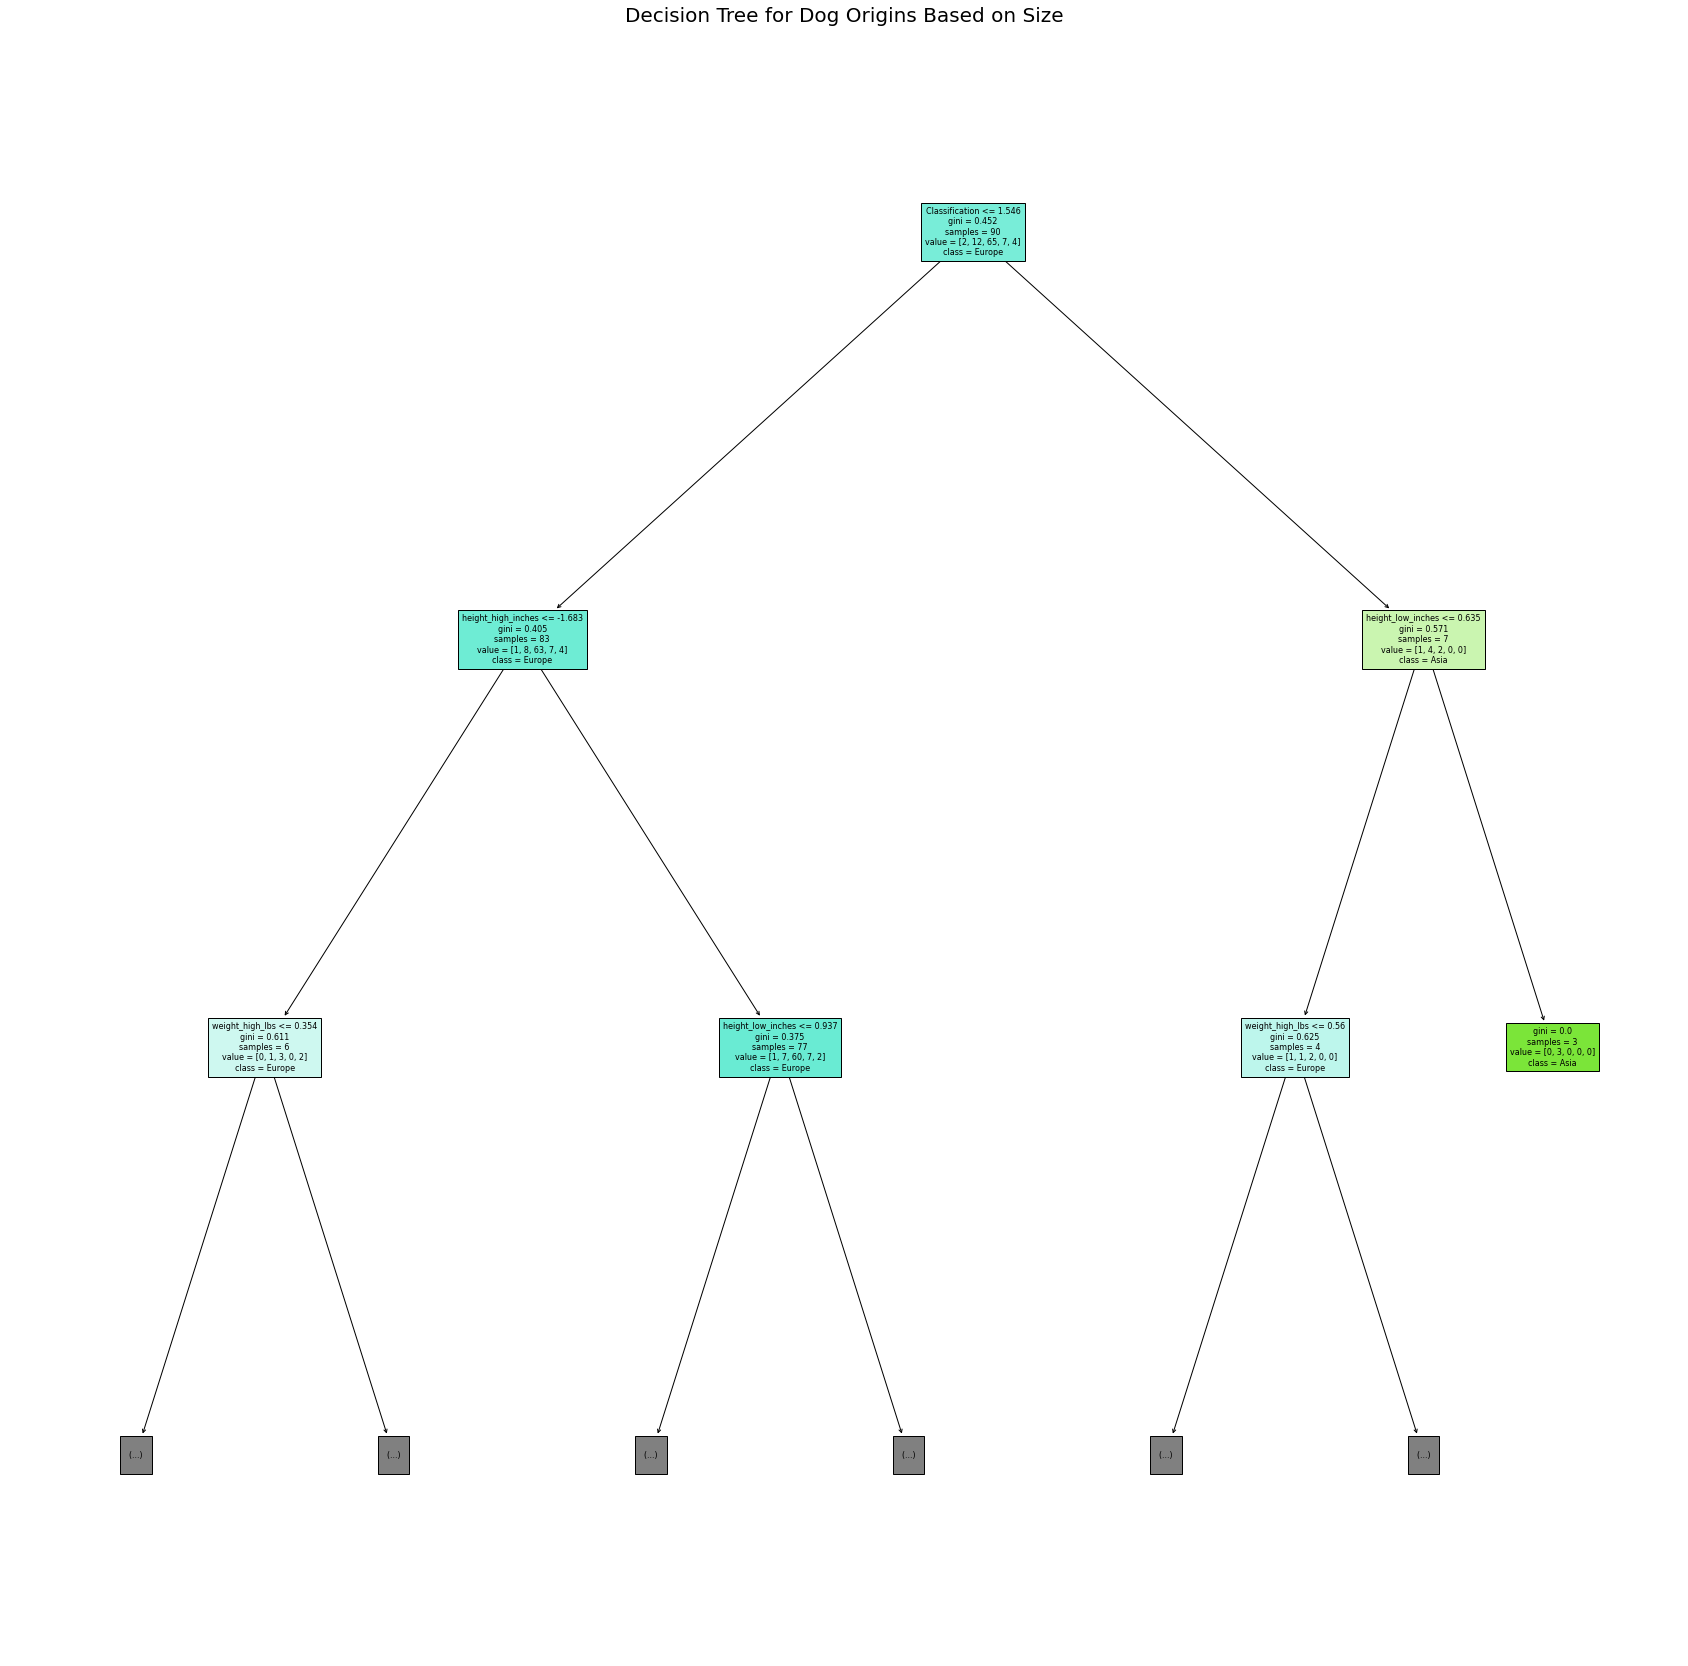

In [7]:
X=dogintel.drop(['Breed', 'obey %', 'reps_lower', 'reps_upper','Origins'], axis=1)
Y=dogintel['Origins']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1998)
best_depth = 1  
best_accuracy = 0   
for k in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth = k)
    model.fit(X_train,Y_train)
    pred_test = model.predict(X_test)
    acc_test = accuracy_score(Y_test, pred_test)

    if best_accuracy < acc_test:
        best_depth=k
        best_accuracy=acc_test
    else: 
        best_depth=best_depth
        best_accuracy=best_accuracy

print("Best Accuracy Prediction Score: " +str(best_accuracy))
print("Best Depth Value: " + str(best_depth))

plt.figure(figsize=(30,30))
tree.plot_tree(model,max_depth=best_depth, filled=True, class_names=['Africa', 'Asia', 'Europe', 'North America', 'Oceania'], feature_names=('Classification', 'height_low_inches','height_high_inches','weight_low_lbs','weight_high_lbs'), fontsize=8)
plt.title("Decision Tree for Dog Origins Based on Size", fontsize=20)
plt.show()



The tree depth with the best accuracy score was at depth 2. The tree is shown above. It can be seen that 3 out of the 4 leaves classify the dog breed as having European origins. This is likely due to a majority of dog breeds in the data having European origins. This is expected as dog breeding is popular in Europe: primarily Great Britain, France, and Germany. If classification were done purely by random, we would expect an accuracy score fo 16.7% as there were 6 continents included in the origins column. Since the accuracy score from the decision tree was found to be 0.75 it suggests an association between intelligence and dog breed origins.

Lastly, a decision tree model will be used once again to model dog breed origins given a dog breed's intelligence level. The decision tree model is chosen again because we can then contrast this decision tree with the previous decision tree in terms of best depth and accuracy.

Best Accuracy Prediction Score: 0.6875
Best Depth Value: 1


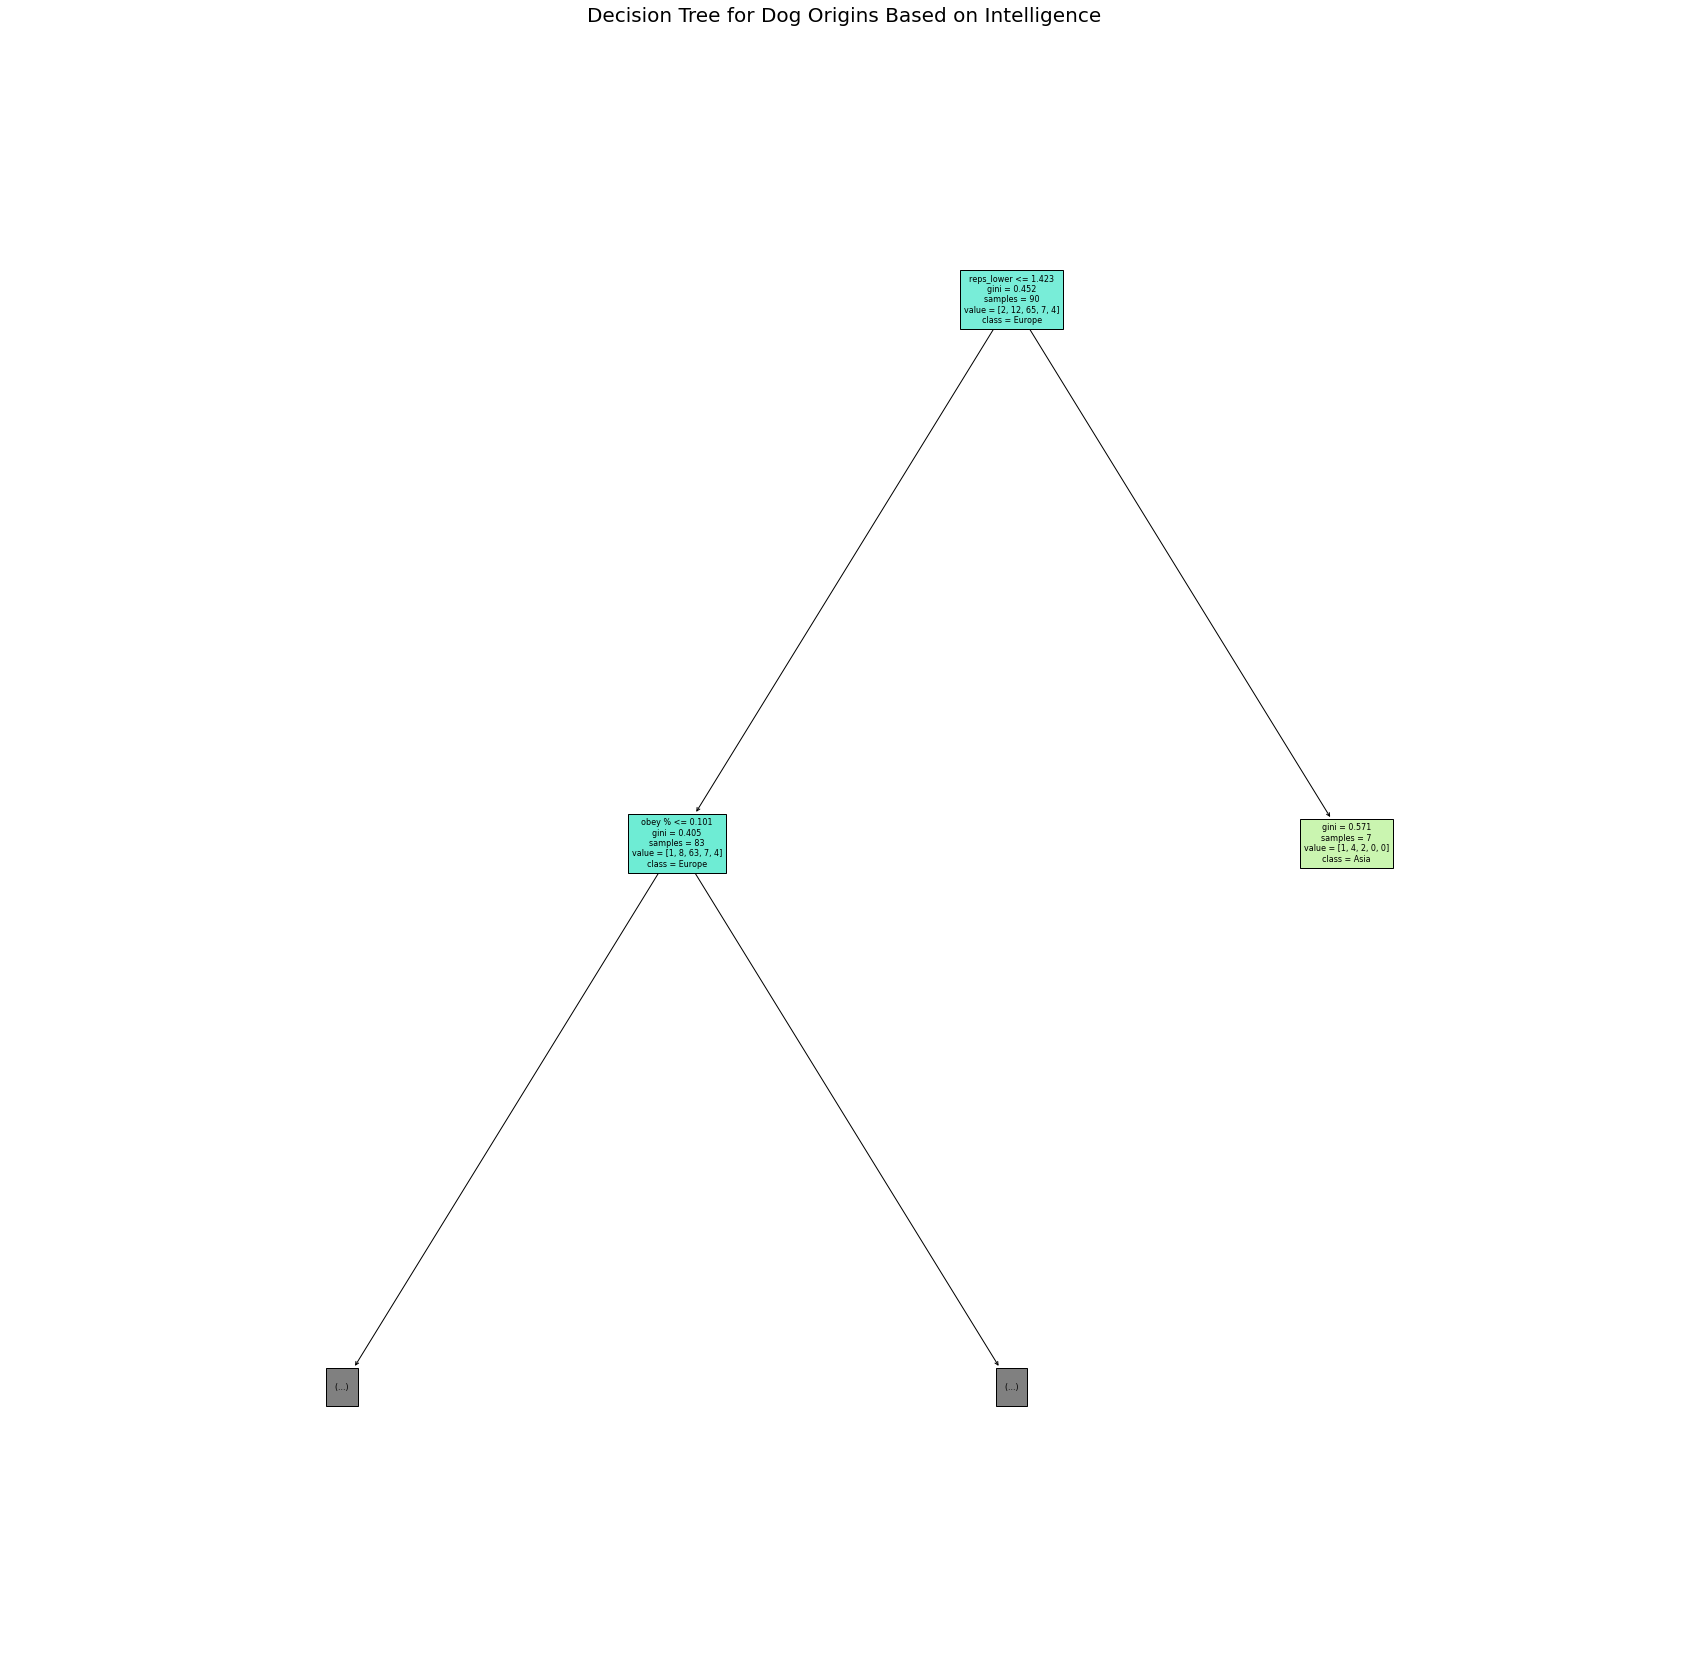

In [19]:
X=dogintel.drop(['Breed','Origins','height_low_inches','height_high_inches','weight_low_lbs','weight_high_lbs'], axis=1)
Y=dogintel['Origins']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1998)
best_depth = 1  
best_accuracy = 0   
for k in range(1, 100):
    model = tree.DecisionTreeClassifier(max_depth = k)
    model.fit(X_train,Y_train)
    pred_test = model.predict(X_test)
    acc_test = accuracy_score(Y_test, pred_test)

    if best_accuracy < acc_test:
        best_depth=k
        best_accuracy=acc_test
    else: 
        best_depth=best_depth
        best_accuracy=best_accuracy

print("Best Accuracy Prediction Score: " +str(best_accuracy))
print("Best Depth Value: " + str(best_depth))

plt.figure(figsize=(30,30))
tree.plot_tree(model,max_depth=best_depth, filled=True, class_names=['Africa', 'Asia', 'Europe', 'North America', 'Oceania'], feature_names=('Classification', 'obey %', 'reps_lower', 'reps_upper'), fontsize=8)
plt.title("Decision Tree for Dog Origins Based on Intelligence", fontsize=20)
plt.show()


This tree diagram has a smaller depth and lower accuracy score than the previous diagram. Since there are less leaves in this tree diagram the European breed dominance in the data isn't reflected as well as only 1 of 2 leaves classify a breed as European. The accuracy score of 
0.6875 or 68.75% is once again higher than the expected average from a random classification of 16.7% which suggests there is an association between size and dog breed origins.

Since the accuracy score for the decision tree used for intelligence was higher, it is probable that size is a better predictor of origins than size for dog breeds.

This data set proved to be ineffective in predicting the origin of dog breeds as it appears that guessing Europe will more often than not be correct as seen in the two tree diagrams because European breeds make up the majority of dog breeds. My hypothesis that dog size is linked with dog intelligence due to larger brain sizes failed to be concretely proven by the K-Nearest Neighbors model due to the relatively low accuracy score of ~50%. There aren't enough dog breeds from non European continents to prevent guessing Europe as a dog breed's origins to be a reliable way of predicting correctly. 

The models used on this data set proved to be more effective than random classification when determining the origins or classification of various dog breeds. My hypothesis that breed size and intelligence would be associated due to potentially larger brain sizes failed to be concretely reflected in the results as the K-Nearest Neighbors model achieved an accuracy of ~50%. My initial guess that size and intelligence would be poor predictors for breed origins was also not reflected in the results as the decision tree models achieved 68.75% and 75% accuracy respectively. I believe the accuracy scores from the decision tree models displayed better results due to the prominence of European dog breeds in the dataset and thus European classifications would be correct for a large portion of the time.